# Thinking 1 :如何使用用户标签来指导业务（如何提升业务）?

答：
为用户建立用户画像后，标签的赋能（对业务的指导）分为用户生命周期（LTV）的三个阶段：获客、粘客、留客。
1. 获客：如何进行拉新，通过更精准的营销获取客户。 由于前期获客阶段用户的标签不够充分，因此分为两个维度： 用户维度（User）与商品维度（Item）。
>1) 商品维度：对本产品中的热门商品（已完善的商品体系）、特色商品（新开发的商品体系）进行广告推荐；  
基于商品特色，针对性的向潜在用户群体投放广告，将用户的广告点击行为打上新的标签。  
2）用户维度：基于用户已有的标签，推荐相应适合的商品，并根据其点击行为等更新其标签。   
2. 粘客：个性化推荐，搜索排序，场景运营等。对于使用中的客户，拥有充分的标签，因此需要对其进行更加个性化的推荐。以保证其对本商品的粘性。这其中涉及到‘协同过滤’以及‘推荐系统的EE问题’。
>1)协同过滤算法：通过将与此人相似人群喜欢的事物，对此人进行推荐，实现推荐算法。  
2）EE问题（Explore and Exploit）：充分利用已有资源的前提下，针对产品的用户人群推送其他新的未购买过的商品（关联算法），以产生新鲜感。  
3. 留客：  流失率预测，分析关键节点降低流失率  


# Thinking 2 : 如果给你一堆用户数据，没有打标签。你该如何处理（如何打标签）?

答：  
一、数据初步分析层（一级标签）：  
首先，需要将用户的数据进行分类，打上一级标签，这涉及到四个维度：
八字原则：用户消费行为分析
1. 用户标签：性别、年龄、地域、收入、学历、职业等
2. 消费标签：消费习惯、购买意向、是否对促销敏感
3. 行为标签：时间段、频次、时长、收藏、点击、喜欢、评分
（User Behavior可以分成Explicit Behavior显式行为和Implicit Behavior隐式行为）
4. 内容分析：对用户平时浏览的内容进行分析，比如体育、游戏、八卦  

二、算法层（二级标签）：  
在初步分析基础上，对用户进行聚类分析、标签算法、关联算法的分析，为用户打上二级标签：  
用户画像建立、Item特性、产品购买偏好、用户关联关系、热门商品、热门话题支付行为偏好、优惠偏好  

三、预测算法层（三级标签）：  
基于上述两层标签的预测标签：如购买某项产品的预测，用户流失预测等。

# Thinking 3 : 准确率和精确率有何不同（评估指标）?

混淆矩阵：

 \      | \  | 预测类别 |  \ 
--------|----|----------|---    
\       |    |yes       | no      
实际类别| yes|TP        |FN  
  \     | no |FP        |TN  

准确率为:$$accuracy = \frac{TP+TN}{TP+FN+FP+TN}$$
精确率为:$$precision = \frac{TP}{TP+FP}$$
召回率为:$$recall = \frac{TP}{TP+FN}$$
F值：$$F = \frac{(\alpha^2 + 1)precision \cdot recall}{\alpha^2(precision + recall)}$$
准确率指所有预测正确的值占所有总体的比重。  
精确率指所有真实正确的值，占预测为正确的值的比重。

# Thinking 4 : 如果你使用大众点评，想要给某个餐厅打标签。这时系统可以自动提示一些标签，你会如何设计（标签推荐）?

答：  
1. 基于与此家餐厅相似餐厅的标签推荐、系统中最热门的标签进行推荐（Items--CF）。
2. 基于其他用户给此家餐厅的标签推荐、基于用户历史最常用标签进行推荐（Users--CF）。
3. 最后将标签进行组合推荐（赋权）。

# Thinking 5 : 我们今天使用了10种方式来解MNIST，这些方法有何不同？你还有其他方法来解决MNIST识别问题么（分类方法）?

答：
1. LR：传统机器学习分类算法，属于有监督学习，本质是在线性回归基础上加上一个sigmoid映射到0-1区间，以解决二分类问题。
2. 决策树：传统机器学习分类算法，属于有监督学习，非参数方法，强分类器，容易过拟合。
3. LDA：主题模型，以条件概率为基础，常用于文本的主题分类。
4. 朴素贝叶斯：sklearn提供三类分类器：伯努利分布、多项式分布、正态分布，常用于文本分类、、情感预测等，最大的特点是假设各属性间分布独立。
5. SVM：将数据映射到多维空间，以将一维空间不可分类的数据进行分类。
6. KNN: K最近邻算法，通过与最接近的K个邻居计算距离，以达到分类效果。
7. AdaBoost:以多个弱分类器构建的强分类器
8. XGBoost: 多个弱分类器构成的强分类器，在GBDT基础上加入了正则化项
9. TPOT:AUTO-ML方法，300种方法中找到最优的解
10. keras:神经网络方法，可解释性不够强，但得到的结果可能更好。  

其他方法：  
    LGBoost，比XGBoost更加轻量级的分类方法，加入了二阶泰勒展开式。

# Action 1 :针对Delicious数据集，对SimpleTagBased算法进行改进（使用NormTagBased、TagBased-TFIDF算法）

## 数据加载与探索

In [57]:
# 使用SimpleTagBased算法对Delicious2K数据进行推荐
# 原始数据集：https://grouplens.org/datasets/hetrec-2011/
# 数据格式：userID     bookmarkID     tagID     timestamp
import random
import math
import operator
import pandas as pd

file_path = "./user_taggedbookmarks-timestamps.dat"
# 字典类型，保存了user对item的tag，即{userid: {item1:[tag1, tag2], ...}}
records = {}
# 训练集，测试集
train_data = dict()
test_data = dict()

# 用户标签，商品标签
user_tags = dict()
tag_items = dict()
user_items = dict()

# 数据加载
def load_data():
    print("开始数据加载...")
    df = pd.read_csv(file_path, sep='\t')
    print(df)
    for i in range(len(df)):
        uid = df['userID'][i]
        iid = df['bookmarkID'][i]
        tag = df['tagID'][i]
        # 键不存在时，设置默认值{}
        records.setdefault(uid,{})
        records[uid].setdefault(iid,[])
        records[uid][iid].append(tag)
    print("数据集大小为 %d." % (len(df)))
    print("设置tag的人数 %d." % (len(records)))
    print("数据加载完成\n")
#     for i in records.items():
#         print(i, '\n')

   
%time load_data()

开始数据加载...
        userID  bookmarkID  tagID      timestamp
0            8           1      1  1289255362000
1            8           2      1  1289255159000
2            8           7      1  1289238901000
3            8           7      6  1289238901000
4            8           7      7  1289238901000
...        ...         ...    ...            ...
437588  108035       30993    193  1277495315000
437589  108035       30993    673  1277495315000
437590  108035       30994    130  1277223715000
437591  108035       30994    267  1277223715000
437592  108035       30994   4943  1277223715000

[437593 rows x 4 columns]
数据集大小为 437593.
设置tag的人数 1867.
数据加载完成

Wall time: 7.15 s


In [7]:
#如何加载 dat 格式文件
data = pd.read_csv('user_taggedbookmarks-timestamps.dat', sep = '\t')
data

,userID,bookmarkID,tagID,timestamp
0,8,1,1,1289255362000
1,8,2,1,1289255159000
2,8,7,1,1289238901000
3,8,7,6,1289238901000
4,8,7,7,1289238901000
...,...,...,...,...
437588,108035,30993,193,1277495315000
437589,108035,30993,673,1277495315000
437590,108035,30994,130,1277223715000
437591,108035,30994,267,1277223715000


In [1]:
import pandas as pd
import random 
from collections import defaultdict

#直接传入会出错
def defaultdict_list():
    return defaultdict(list)
#创建一个默认字典
records = defaultdict(defaultdict_list)

#加载数据
def load_data():
    #如何加载 dat 格式文件
    data = pd.read_csv('user_taggedbookmarks-timestamps.dat', sep = '\t')
    for i in range(data.shape[0]):
        records[data.iloc[i, 0]][data.iloc[i, 1]].append(data.iloc[i, 2])
    print('共加载{}条数据'.format(data.shape[0]))
    print('总计{}人'.format(len(records)))

%time load_data()

共加载437593条数据
总计1867人
Wall time: 31.3 s


- ### 很明显，setdefault运算会更快

## 数据切分

In [2]:
# 将数据集拆分为训练集和测试集
test_data = {}
train_data = {}

def train_test_split(ratio, seed=100):
    count = 0
    random.seed(seed)
    for u in records.keys():
        for i in records[u].keys():
            # ratio比例设置为测试集
            if random.random()<ratio:
                test_data.setdefault(u,{})
                test_data[u].setdefault(i,[])
                for t in records[u][i]:
                    test_data[u][i].append(t)
                    count += 1
            else:
                train_data.setdefault(u,{})
                train_data[u].setdefault(i,[])
                for t in records[u][i]:
                    train_data[u][i].append(t)  
                    
    print('切分比例:{}'.format(count / 437593))                
    print("训练集用户数 {}, 测试集用户数 {}" .format(len(train_data),len(test_data)))
    
train_test_split(0.2)

切分比例:0.19829384839337008
训练集用户数 1860, 测试集用户数 1793


## 数据结构 “user_tags; user_items; tag_items; tag_users” 初始化

In [3]:
#初始化users-items；users-tags；items-tags矩阵
# 设置矩阵 mat[index, item] = 1
user_tags = {}
user_items = {}
tag_items = {}
tag_users = {}
def addValueToMat(mat, index, item, value=1):
    if index not in mat:
        mat.setdefault(index,{})
        mat[index].setdefault(item,value)
    else:
        if item not in mat[index]:
            mat[index][item] = value
        else:
            mat[index][item] += value

            
# 使用训练集，初始化user_tags, tag_items, user_items
def initStat():
    records=train_data
    for u,items in records.items():
        for i,tags in items.items():
            for tag in tags:
                #print tag
                # 用户和tag的关系
                addValueToMat(user_tags, u, tag, 1)
                # tag和item的关系
                addValueToMat(tag_items, tag, i, 1)
                # 用户和item的关系
                addValueToMat(user_items, u, i, 1)
                #标签和用户的关系
                addValueToMat(tag_users, tag, u, 1)
    print("user_tags, tag_items, user_items, tag_users初始化完成.")
    print("user_tags大小 %d, tag_items大小 %d, user_items大小 %d, tag_users大小 %d" % (len(user_tags), len(tag_items), len(user_items), len(tag_users)))

initStat()

user_tags, tag_items, user_items, tag_users初始化完成.
user_tags大小 1860, tag_items大小 36884, user_items大小 1860, tag_users大小 36884


## 基于SimpleTagBased算法的TOP-N推荐

In [12]:
import operator
# 对用户user推荐Top-N
def simple_recommend(user, N):
    recommend_items = dict()
    # 对Item进行打分，分数为所有的（用户对某标签使用的次数 wut, 乘以 商品被打上相同标签的次数 wti）之和
    tagged_items = user_items[user]
    for tag, wut in user_tags[user].items():
        #print(self.user_tags[user].items())
        for item, wti in tag_items[tag].items():
            #用户标记过的商品不需要再计算分数
            if item in tagged_items:
                continue
            #print('wut = %s, wti = %s' %(wut, wti))
            if item not in recommend_items:
                recommend_items[item] = wut * wti
            else:
                recommend_items[item] = recommend_items[item] + wut * wti
    return  sorted(recommend_items.items(), key = operator.itemgetter(1), reverse=True)[0:N]


In [13]:
# 使用测试集，计算准确率和召回率
def simple_precisionAndRecall(N):
    hit = 0
    h_recall = 0
    h_precision = 0
    for user,items in test_data.items():
        #没有标签的用户无法推荐
        if user not in train_data:
            continue
        # 获取Top-N推荐列表
        rank = simple_recommend(user, N)
#         print(rank)
        for item,rui in rank:
            if item in items:
                hit = hit + 1
        h_recall = h_recall + len(items)
        h_precision = h_precision + N
    #print('一共命中 %d 个, 一共推荐 %d 个, 用户设置tag总数 %d 个' %(hit, h_precision, h_recall))
    # 返回准确率 和 召回率
    return (hit/(h_precision*1.0)), (hit/(h_recall*1.0))

# 使用测试集，对推荐结果进行评估
def simple_testRecommend():
    print("推荐结果评估")
    print("%3s %10s %10s" % ('N',"精确率",'召回率'))
    for n in [5,10,20,40,60,80,100]:
        precision,recall = simple_precisionAndRecall(n)
        print("%3d %10.3f%% %10.3f%%" % (n, precision * 100, recall * 100))        

In [14]:
simple_testRecommend()

推荐结果评估
  N        精确率        召回率
  5      0.829%      0.355%
 10      0.633%      0.542%
 20      0.512%      0.877%
 40      0.381%      1.304%
 60      0.318%      1.635%
 80      0.276%      1.893%
100      0.248%      2.124%


## 改进：基于NormTagBased算法与 TF-IDFbased算法 的TOP-N推荐

In [7]:
import operator
import numpy

#标准化：使用 user_tags[user],用户打过的标签类别 总数；tag_users[tag], 使用标签 tag 的用户个数：
#写在前面以减少运行时间
# user_tags_class_counts --->> utcc
utcc = dict()
for user in user_tags.keys():
    utcc[user] = len(user_tags[user])
# tag_users_class_counts --->> tucc
tucc = dict()
for tag in tag_users.keys():
    tucc[tag] = len(tag_users[tag])
    
# 对用户user推荐Top-N    
def improve_recommend(method, user, N):
    recommend_items = dict()
    # 对Item进行打分，分数为所有的（用户对某标签使用的次数 wut, 乘以 商品被打上相同标签的次数 wti）之和

    
    #该用户已打分的items
    tagged_items = user_items[user]
    
    for tag, wut in user_tags[user].items():
        #print(self.user_tags[user].items())
        
        for item, wti in tag_items[tag].items():
            #用户标记过的商品不需要进行推荐
            if item in tagged_items:
                continue
                
            #改进算子类型
            norm = utcc[user] * tucc[tag]
            tf_idf = numpy.log(1 + tucc[tag])
            
            way = 0
            if method == 'norm': way = norm
            if method == 'tf_idf': way = tf_idf
            
            #print('wut = %s, wti = %s' %(wut, wti))
            if item not in recommend_items:
                recommend_items[item] = wut * wti / way
            else:
                recommend_items[item] = recommend_items[item] + wut * wti / way
                
    return  sorted(recommend_items.items(), key = operator.itemgetter(1), reverse=True)[0:N]


In [8]:
# 使用测试集，计算准确率和召回率
def precisionAndRecall(method, N):
    hit = 0
    h_recall = 0
    h_precision = 0
    for user,items in test_data.items():
        #未训练过的用户无法进行推荐
        if user not in train_data:
            continue
        # 获取Top-N推荐列表
        rank = improve_recommend(method, user, N)
        for item,rui in rank:
            if item in items:
                hit = hit + 1
        h_recall = h_recall + len(items)
        h_precision = h_precision + N
    #print('一共命中 %d 个, 一共推荐 %d 个, 用户设置tag总数 %d 个' %(hit, h_precision, h_recall))
    # 返回准确率 和 召回率
    return (hit/(h_precision*1.0)), (hit/(h_recall*1.0))

# 使用测试集，对推荐结果进行评估
def testRecommend(method = str()):
    print("{}based 算子推荐结果评估:".format(method))
    print("%3s %10s %10s" % ('N',"精确率",'召回率'))
    for n in [5,10,20,40,60,80,100]:
        precision,recall = precisionAndRecall(method, n)
        print("%3d %10.3f%% %10.3f%%" % (n, precision * 100, recall * 100))  

In [9]:
testRecommend('norm')
testRecommend('tf_idf')

normbased 算子推荐结果评估:
  N        精确率        召回率
  5      0.907%      0.388%
 10      0.638%      0.546%
 20      0.507%      0.868%
 40      0.356%      1.218%
 60      0.287%      1.476%
 80      0.255%      1.750%
100      0.241%      2.061%
tf_idfbased 算子推荐结果评估:
  N        精确率        召回率
  5      1.008%      0.431%
 10      0.761%      0.652%
 20      0.549%      0.940%
 40      0.402%      1.376%
 60      0.328%      1.687%
 80      0.297%      2.033%
100      0.269%      2.306%


# Action 2 : 对Titanic数据进行清洗，建模并对乘客生存进行预测。使用之前介绍过的10种模型中的至少2种（包括TPOT）

In [6]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- ####  可以发现，age 和 cabin 是缺失数据。

In [8]:
print(train.Name)

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.


<AxesSubplot:title={'center':'年龄导致的幸存差异Age'}>

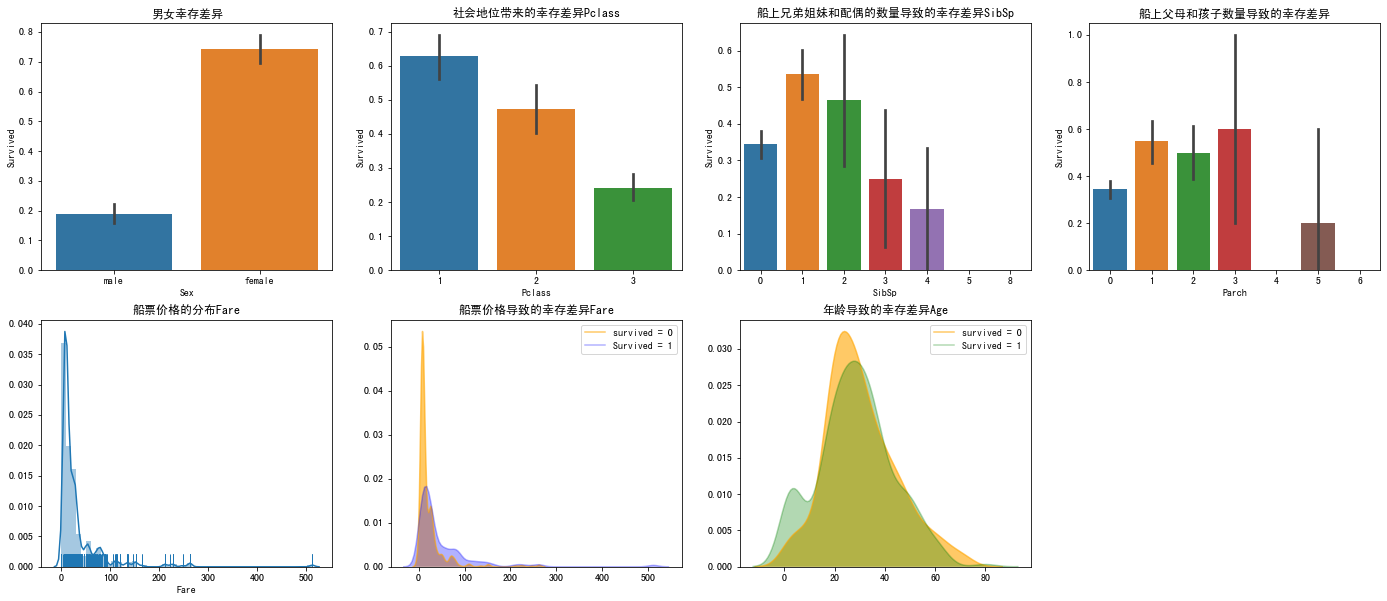

In [9]:
#男女幸存差异
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

fig = plt.figure(figsize = [24, 10])
plt.subplot(2,4,1)
plt.title('男女幸存差异')
sns.barplot(x = 'Sex', y = 'Survived', data = train)

plt.subplot(2,4,2)
plt.title('社会地位带来的幸存差异Pclass')
sns.barplot(x = 'Pclass', y = 'Survived', data = train)

plt.subplot(2,4,3)
plt.title('船上兄弟姐妹和配偶的数量导致的幸存差异SibSp')
sns.barplot(x = 'SibSp', y = 'Survived', data = train)

plt.subplot(2,4,4)
plt.title('船上父母和孩子数量导致的幸存差异')
sns.barplot(x = 'Parch', y = 'Survived', data = train)

plt.subplot(2,4,5)
plt.title('船票价格的分布Fare')
sns.distplot(train.Fare, hist = True, kde = True, rug = True)

plt.subplot(2,4,6)
plt.title('船票价格导致的幸存差异Fare')
sns.kdeplot(train.loc[train['Survived'] == 0, "Fare"], shade=True, color="orange", label="survived = 0", alpha=.6)
sns.kdeplot(train.loc[train['Survived'] == 1, "Fare"], shade=True, color="blue", label="Survived = 1", alpha=.3)

plt.subplot(2,4,7)
plt.title('年龄导致的幸存差异Age')
sns.kdeplot(train.loc[train['Survived'] == 0, "Age"], shade=True, color="orange", label="survived = 0", alpha=.6)
sns.kdeplot(train.loc[train['Survived'] == 1, "Age"], shade=True, color="green", label="Survived = 1", alpha=.3)



## Age, Cabin 的空值可以通过贝叶斯等机器学习学习得来
## 因此先处理 Ticket 和 Name 和 Sex 这些字符串数据

In [10]:
#对于 ticket 数据，存在重复值，说明重复值为多人结伴而行
all_data = pd.concat([train, test], axis = 0).reset_index()
party = all_data.Ticket.value_counts()
party_dict = {}
for index, number in party.items():
    party_dict[index] = number
    
train['Party'] = 0
for i in range(len(train)):    
    train.Party[i] = party_dict[train.Ticket[i]] 
train

test['Party'] = 0
for i in range(len(test)):    
    test.Party[i] = party_dict[test.Ticket[i]] 
test

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


In [11]:
# 姓名中包含称谓信息
#将.转换为，并分割，可得到称谓（mr,mrs,miss,master等）
train['Title'] = 'N'
for i in range(len(train)): 
    train['Title'][i] = train.Name[i].split(',')[1].split('.')[0]
    
train['Title'].replace(" Don", " Dona", inplace = True)
dict1 = dict(train['Title'].value_counts())
print(dict1)

test['Title'] = 'N'
for i in range(len(test)): 
    test['Title'][i] = test.Name[i].split(',')[1].split('.')[0]
    
dict2 = dict(test['Title'].value_counts())
print(dict2)

title_label_dict = {}
number = len(dict1)
for title, count in dict1.items():
    title_label_dict[title] = number
    number -= 1   
print(title_label_dict)

train["Title_label"] = 0
for i in range(len(train)):
    train["Title_label"][i] = title_label_dict[train['Title'][i]]
train

test["Title_label"] = 0
for i in range(len(test)):
    test["Title_label"][i] = title_label_dict[train['Title'][i]]
test

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a co

{' Mr': 517, ' Miss': 182, ' Mrs': 125, ' Master': 40, ' Dr': 7, ' Rev': 6, ' Col': 2, ' Mlle': 2, ' Major': 2, ' Ms': 1, ' the Countess': 1, ' Dona': 1, ' Jonkheer': 1, ' Capt': 1, ' Mme': 1, ' Lady': 1, ' Sir': 1}
{' Mr': 240, ' Miss': 78, ' Mrs': 72, ' Master': 21, ' Rev': 2, ' Col': 2, ' Dona': 1, ' Ms': 1, ' Dr': 1}
{' Mr': 17, ' Miss': 16, ' Mrs': 15, ' Master': 14, ' Dr': 13, ' Rev': 12, ' Col': 11, ' Mlle': 10, ' Major': 9, ' Ms': 8, ' the Countess': 7, ' Dona': 6, ' Jonkheer': 5, ' Capt': 4, ' Mme': 3, ' Lady': 2, ' Sir': 1}


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party,Title,Title_label
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr,17
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs,15
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr,16
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr,15
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,Mrs,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Mr,17
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3,Dona,17
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr,15
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,Mr,15


In [12]:
#处理 sex 性别
train["Sex"].replace('male', 0, inplace = True)
train["Sex"].replace('female', 1, inplace = True)
test["Sex"].replace('male', 0, inplace = True)
test["Sex"].replace('female', 1, inplace = True)


In [13]:
# 处理 embarked 上船地址
all_data = pd.concat([train, test], axis = 0).reset_index().drop(['Name', 'Ticket', 'Title','index'], axis = 1)

embarked_dict = {}
embarked_dict = dict(all_data["Embarked"].value_counts())
#标签编码
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["Embarked"] = train["Embarked"].fillna("S")
train["Embarked"] = le.fit_transform(train["Embarked"])
print(train["Embarked"].value_counts())
test["Embarked"] = le.fit_transform(test["Embarked"])
test["Embarked"].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64


2    270
0    102
1     46
Name: Embarked, dtype: int64

## 处理年龄缺失值
- ## 采用预测的方法，有数据年龄为train集，无年龄数据为test集
- ### 15, 30 是两个明显分割节点，以此预测数据是那个集合内

In [14]:
all_data = pd.concat([train, test], axis = 0).reset_index().drop(['Name', 'Ticket', 'Title','index'], axis = 1)
all_data["Age"] = all_data["Age"].fillna("N")

In [15]:
train_age = all_data.iloc[all_data[all_data['Age'] != 'N'].index].reset_index().drop(['index'], axis = 1)
train_age["Age"] = [int(age) for age in train_age["Age"]] 
train_age["Fare"] = train_age["Fare"].fillna(train_age["Fare"].mean())
train_age["Age_group"] = 0
train_age["Age_group"] = list(map(lambda x:1 if int(x) <= 15  else 0, train_age["Age"]))

need_age = all_data.iloc[all_data[all_data['Age'] == 'N'].index].reset_index().drop(['index'], axis = 1)

train_age.info()
need_age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1046 non-null   int64  
 1   Survived     714 non-null    float64
 2   Pclass       1046 non-null   int64  
 3   Sex          1046 non-null   int64  
 4   Age          1046 non-null   int64  
 5   SibSp        1046 non-null   int64  
 6   Parch        1046 non-null   int64  
 7   Fare         1046 non-null   float64
 8   Cabin        272 non-null    object 
 9   Embarked     1046 non-null   int32  
 10  Party        1046 non-null   int64  
 11  Title_label  1046 non-null   int64  
 12  Age_group    1046 non-null   int64  
dtypes: float64(2), int32(1), int64(9), object(1)
memory usage: 102.3+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Party,Title_label
0,6,0.0,3,0,N,0,0,8.4583,NaN,1,1,17
1,18,1.0,2,0,N,0,0,13.0000,NaN,2,1,17
2,20,1.0,3,1,N,0,0,7.2250,NaN,0,1,15
3,27,0.0,3,0,N,0,0,7.2250,NaN,0,1,17
4,29,1.0,3,1,N,0,0,7.8792,NaN,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...
258,1300,NaN,3,1,N,0,0,7.7208,NaN,1,1,17
259,1302,NaN,3,1,N,0,0,7.7500,NaN,1,1,17
260,1305,NaN,3,0,N,0,0,8.0500,NaN,2,1,17
261,1308,NaN,3,0,N,0,0,8.0500,NaN,2,1,15


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

train_x, test_x, train_y, test_y = train_test_split(train_age.drop(["PassengerId", "Survived",  "Age", "Cabin", 'Age_group'], axis = 1), train_age["Age_group"], test_size = 0.25, random_state = 33)
# 创建GaussianNB分类器
model = GaussianNB()
model.fit(train_x, train_y)
predict_y = model.predict(test_x)
print('GaussianNB准确率: %0.4lf' % accuracy_score(predict_y, test_y))
train_x

GaussianNB准确率: 0.8969


,Pclass,Sex,SibSp,Parch,Fare,Embarked,Party,Title_label
169,2,1,0,0,21.0000,2,2,16
275,2,0,0,0,13.0000,2,1,17
62,3,0,0,0,9.5000,2,1,17
530,1,0,1,0,52.0000,2,2,17
657,3,0,0,0,8.6625,2,1,17
...,...,...,...,...,...,...,...,...
57,3,0,0,0,56.4958,2,8,17
658,1,0,0,0,0.0000,2,1,5
578,2,1,3,0,21.0000,2,2,15
391,3,0,0,0,7.2500,2,1,17


## 若 age_group == 1，则为小孩，生存率大大提高，将缺失数据分别填入两集体的平均值

In [17]:
need_age["Age_group"] = 0
need_age["Age_group"] = model.predict(need_age.drop(["PassengerId", "Survived",  "Age", "Cabin", 'Age_group'], axis = 1))
need_age

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Party,Title_label,Age_group
0,6,0.0,3,0,N,0,0,8.4583,NaN,1,1,17,0
1,18,1.0,2,0,N,0,0,13.0000,NaN,2,1,17,0
2,20,1.0,3,1,N,0,0,7.2250,NaN,0,1,15,0
3,27,0.0,3,0,N,0,0,7.2250,NaN,0,1,17,0
4,29,1.0,3,1,N,0,0,7.8792,NaN,1,1,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,1300,NaN,3,1,N,0,0,7.7208,NaN,1,1,17,0
259,1302,NaN,3,1,N,0,0,7.7500,NaN,1,1,17,0
260,1305,NaN,3,0,N,0,0,8.0500,NaN,2,1,17,0
261,1308,NaN,3,0,N,0,0,8.0500,NaN,2,1,15,0


In [18]:
Age_group1_mean = train_age[train_age["Age_group"] == 1]["Age"].mean()
Age_group0_mean = train_age[train_age["Age_group"] == 0]["Age"].mean()
print(Age_group0_mean, Age_group1_mean)

32.7422126745435 6.504347826086956


In [19]:
for i in range(len(need_age)):
    if need_age["Age_group"][i] == 0:
        need_age["Age"][i] = 33
    else:
        need_age["Age"][i] = 6
need_age

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Party,Title_label,Age_group
0,6,0.0,3,0,33,0,0,8.4583,NaN,1,1,17,0
1,18,1.0,2,0,33,0,0,13.0000,NaN,2,1,17,0
2,20,1.0,3,1,33,0,0,7.2250,NaN,0,1,15,0
3,27,0.0,3,0,33,0,0,7.2250,NaN,0,1,17,0
4,29,1.0,3,1,33,0,0,7.8792,NaN,1,1,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,1300,NaN,3,1,33,0,0,7.7208,NaN,1,1,17,0
259,1302,NaN,3,1,33,0,0,7.7500,NaN,1,1,17,0
260,1305,NaN,3,0,33,0,0,8.0500,NaN,2,1,17,0
261,1308,NaN,3,0,33,0,0,8.0500,NaN,2,1,15,0


In [20]:
all_data = pd.concat([train_age, need_age], axis = 0)
all_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Party,Title_label,Age_group
0,1,0.0,3,0,22,1,0,7.2500,NaN,2,1,17,0
1,2,1.0,1,1,38,1,0,71.2833,C85,0,2,15,0
2,3,1.0,3,1,26,0,0,7.9250,NaN,2,1,16,0
3,4,1.0,1,1,35,1,0,53.1000,C123,2,2,15,0
4,5,0.0,3,0,35,0,0,8.0500,NaN,2,1,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,1300,NaN,3,1,33,0,0,7.7208,NaN,1,1,17,0
259,1302,NaN,3,1,33,0,0,7.7500,NaN,1,1,17,0
260,1305,NaN,3,0,33,0,0,8.0500,NaN,2,1,17,0
261,1308,NaN,3,0,33,0,0,8.0500,NaN,2,1,15,0


## 处理 Cabin 缺失值

In [21]:
all_data1 = pd.concat([train["Ticket"], test["Ticket"]], axis = 0).reset_index().drop(["index"], axis = 1)
all_data = pd.concat([all_data.reset_index().drop(["index"], axis = 1),all_data1], axis = 1)
all_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Party,Title_label,Age_group,Ticket
0,1,0.0,3,0,22,1,0,7.2500,NaN,2,1,17,0,A/5 21171
1,2,1.0,1,1,38,1,0,71.2833,C85,0,2,15,0,PC 17599
2,3,1.0,3,1,26,0,0,7.9250,NaN,2,1,16,0,STON/O2. 3101282
3,4,1.0,1,1,35,1,0,53.1000,C123,2,2,15,0,113803
4,5,0.0,3,0,35,0,0,8.0500,NaN,2,1,17,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1300,NaN,3,1,33,0,0,7.7208,NaN,1,1,17,0,A.5. 3236
1305,1302,NaN,3,1,33,0,0,7.7500,NaN,1,1,17,0,PC 17758
1306,1305,NaN,3,0,33,0,0,8.0500,NaN,2,1,17,0,SOTON/O.Q. 3101262
1307,1308,NaN,3,0,33,0,0,8.0500,NaN,2,1,15,0,359309


In [22]:
ticket_cabin = {}

all_data["Cabin"] = all_data["Cabin"].fillna("nan")
for i in range(len(all_data)):
    if (all_data["Ticket"][i] not in ticket_cabin) and (all_data["Cabin"][i] != 'nan'):
        ticket_cabin[all_data["Ticket"][i]] = all_data["Cabin"][i]
    else:
        continue
ticket_cabin

for i in range(len(all_data)):
    if (all_data["Cabin"][i] == 'nan') and (all_data["Ticket"][i] in ticket_cabin):
        all_data["Cabin"][i] = ticket_cabin[all_data["Ticket"][i]]

all_data["Cabin"].replace("nan", "N", inplace = True)
all_data["Cabin"].value_counts()

for i in range(len(all_data)):
    all_data["Cabin"][i] = list(all_data["Cabin"][i])[0]
all_data["Cabin"]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0       N
1       C
2       N
3       C
4       N
       ..
1304    N
1305    N
1306    N
1307    N
1308    N
Name: Cabin, Length: 1309, dtype: object

<AxesSubplot:title={'center':'各船舱的幸存率'}, xlabel='Cabin', ylabel='Survived'>

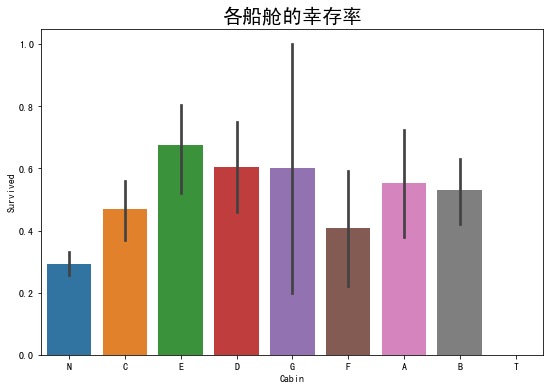

In [23]:
fig2 = plt.figure(figsize = [9,6])
plt.title("各船舱的幸存率", size = 20)
sns.barplot(x = 'Cabin', y = 'Survived', data = all_data)

In [24]:
cabin_dict = {}
number = 0
for cabin, count in dict(all_data["Cabin"].value_counts()).items():
    cabin_dict[cabin] = number
    number += 1
cabin_dict

{'N': 0, 'C': 1, 'B': 2, 'D': 3, 'E': 4, 'A': 5, 'F': 6, 'G': 7, 'T': 8}

In [25]:
for i in range(len(all_data)):
    all_data["Cabin"][i] = int(cabin_dict[all_data["Cabin"][i]])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
all_data["Age"] = [int(age) for age in all_data["Age"]]
all_data = all_data.sort_values(by = "PassengerId").reset_index().drop(['index'], axis = 1)
all_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Party,Title_label,Age_group,Ticket
0,1,0.0,3,0,22,1,0,7.2500,0,2,1,17,0,A/5 21171
1,2,1.0,1,1,38,1,0,71.2833,1,0,2,15,0,PC 17599
2,3,1.0,3,1,26,0,0,7.9250,0,2,1,16,0,STON/O2. 3101282
3,4,1.0,1,1,35,1,0,53.1000,1,2,2,15,0,113803
4,5,0.0,3,0,35,0,0,8.0500,0,2,1,17,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,0,33,0,0,8.0500,0,2,1,17,0,SOTON/O.Q. 3101262
1305,1306,NaN,1,1,39,0,0,108.9000,1,0,3,17,0,350405
1306,1307,NaN,3,0,38,0,0,7.2500,1,2,1,15,0,347077
1307,1308,NaN,3,0,33,0,0,8.0500,0,2,1,15,0,359309


In [27]:
all_data["Cabin"] = [int(cabin) for cabin in all_data["Cabin"]]
all_data["Embarked"] = [int(embarked) for embarked in all_data["Embarked"]]

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   int64  
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Cabin        1309 non-null   int64  
 9   Embarked     1309 non-null   int64  
 10  Party        1309 non-null   int64  
 11  Title_label  1309 non-null   int64  
 12  Age_group    1309 non-null   int64  
 13  Ticket       1309 non-null   object 
dtypes: float64(2), int64(11), object(1)
memory usage: 143.3+ KB


# 预测 tatanic 乘客是否生存

In [29]:
#加载数据集
train_ = all_data.iloc[:891].drop(["PassengerId", 'Age_group', "Ticket"], axis = 1)
test_ = all_data.iloc[891:].drop(["PassengerId", 'Age_group', "Ticket", "Survived"], axis = 1)
test_

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Party,Title_label
891,3,0,34,0,0,7.8292,0,1,1,17
892,3,1,47,1,0,7.0000,0,2,1,15
893,2,0,62,0,0,9.6875,0,1,1,16
894,3,0,27,0,0,8.6625,0,2,1,15
895,3,1,22,1,1,12.2875,0,2,2,17
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,33,0,0,8.0500,0,2,1,17
1305,1,1,39,0,0,108.9000,1,0,3,17
1306,3,0,38,0,0,7.2500,1,2,1,15
1307,3,0,33,0,0,8.0500,0,2,1,15


# 使用TPOP方法

In [30]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

data3 = train_.drop(["Survived"], axis = 1)
target = train_["Survived"]
data3
data3.info()
print(target.value_counts())
X_train, X_test, y_train, y_test = train_test_split(data3, target,
                                                    train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    int64  
 2   Age          891 non-null    int64  
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Cabin        891 non-null    int64  
 7   Embarked     891 non-null    int64  
 8   Party        891 non-null    int64  
 9   Title_label  891 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 69.7 KB
0.0    549
1.0    342
Name: Survived, dtype: int64


Exception ignored in: <function Booster.__del__ at 0x000001B995C9B3A8>
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\xgboost\core.py", line 975, in __del__
    _check_call(_LIB.XGBoosterFree(self.handle))
stopit.utils.TimeoutException



Generation 1 - Current best internal CV score: 0.8323757154079228
Generation 2 - Current best internal CV score: 0.833879474806419
Generation 3 - Current best internal CV score: 0.833879474806419
Generation 4 - Current best internal CV score: 0.8398720682302772
Generation 5 - Current best internal CV score: 0.8398720682302772
Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=100, nthread=1, subsample=0.45)


TPOTClassifier(generations=5,
               log_file=<ipykernel.iostream.OutStream object at 0x000001B9F487BA08>,
               population_size=50, random_state=42, verbosity=2)

In [31]:
print(tpot.score(X_test, y_test))
tpot.export('tpot_digits_pipeline.py')

0.8116591928251121


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1)
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.8398720682302772
exported_pipeline = XGBClassifier(learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=100, nthread=1, subsample=0.45)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

In [33]:
from sklearn.metrics import average_precision_score, roc_auc_score, accuracy_score
accuracy_score(y_test, results)

0.8116591928251121

In [34]:
test_predict = exported_pipeline.predict(test_)
passengerid = all_data.iloc[891:]["PassengerId"].tolist()
pre = test_predict.tolist()
pre = [int(i) for i in pre]


pre_results = pd.DataFrame()
pre_results["PassengerId"] = passengerid
pre_results["Survived"] = pre
pre_results.to_csv("result.csv", index = False)
pre_results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#  使用 随机森林 方法

In [35]:
from sklearn.ensemble import RandomForestClassifier

RFmodel = RandomForestClassifier(n_estimators = 30, max_depth = 10, min_samples_split = 100, random_state = 33)
RFmodel.fit(X_train, y_train)
y_predict = RFmodel.predict(X_test)
accuracy_score(y_test, y_predict)

0.8116591928251121

In [36]:
test_predict2 = RFmodel.predict(test_)
passengerid = all_data.iloc[891:]["PassengerId"].tolist()
pre2 = test_predict2.tolist()
pre2 = [int(i) for i in pre2]


pre_results2 = pd.DataFrame()
pre_results2["PassengerId"] = passengerid
pre_results2["Survived"] = pre2
pre_results2.to_csv("result2.csv", index = False)
pre_results2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [37]:
import xlrd
data = xlrd.open_workbook('c:/Users/10109/Documents/Jupyter notebook/人工智能课程(BI方向)/BI名企实训/第 3 章 用户画像/homework/L3-2自测文档.xls')
#通过索引顺序获取
table = data.sheet_by_index(0)

""" 工作表中行/列的操作 """
#获取该sheet中的有效行数
nrows = table.nrows  
print(nrows)
row_index, col_index = 0, 0
# 获取某行信息
for row_index in range(2, nrows-8):
    print(table.row(row_index)[:2])
for row_index in range(nrows-7, nrows):
    print(table.row(row_index)[:2], table.row(row_index)[-2])

24
[text:'原理', text:'为什么需要用户画像，对于业务来说有何帮助']
[text:'原理', text:'有哪些维度可以用来设计用户标签']
[text:'原理', text:'用户生命周期的三个阶段']
[text:'原理', text:'标签从何而来']
[text:'原理', text:'K-Means工作原理']
[text:'原理', text:'距离都有哪些表示方式']
[text:'原理', text:'数据规范化的方法：Min-max，Z-Score，小数定标']
[text:'工具', text:'如何使用K-Means对球队进行聚类']
[text:'工具', text:'使用SimpleTagBased算法进行TOP-N推荐']
[text:'原理', text:'评测指标：准确率，召回率，精确率，F值']
[text:'原理', text:'什么是TF-IDF']
[text:'原理', text:'基于内容的推荐系统步骤']
[text:'工具', text:'使用TPOT对MNIST进行分类']
[text:'工具', text:'使用Python对Titanic数据进行清洗']
[text:'Thinking1', text:'如何使用用户标签来指导业务（如何提升业务）'] text:'能用自己的语言总结标签对业务的作用（10points）'
[text:'Thinking2', text:'如果给你一堆用户数据，没有打标签。你该如何处理（如何打标签）'] text:'能列举对于数据打标签的方法（10points）'
[text:'Thinking3', text:'准确率和精确率有何不同（评估指标）'] text:'对不同评估指标的作用理解（10points）'
[text:'Thinking4', text:'如果你使用大众点评，想要给某个餐厅打标签。这时系统可以自动提示一些标签，你会如何设计（标签推荐）'] text:'针对标签推荐的场景，能简要说明设计标签推荐的原理（10points）'
[text:'Thinking5', text:'我们今天使用了10种方式来解MNIST，这些方法有何不同？你还有其他方法来解决MNIST识别问题么（分类方法）'] text:'1、能理解不同分类算法的差异（10points）